In [1]:
%matplotlib notebook
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from fridge import Fridge
from tes import TES
from QET import QET
from detector import Detector
from electronics import Electronics
from absorber import Absorber
from simulated_noise import simulate_noise
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from MaterialProperties import TESMaterial

In [2]:
printing = False
fSnolab = Fridge("SNOLAB", 20e-3, 145e-3, 900e-3, 4.8, 0)
# Absorber: Silicon. Height 1mm. Radius 38.1mm. W safety 3mm. 
# Q: W safety removes a huge % of patterned surface area
absorber = Absorber("Si", "square", 1e-3, 10e-3, 3e-3, printing) # same as matlab
eSnolab = Electronics(fSnolab, fSnolab.get_TCP(), fSnolab.get_TMC())
eSLAC = Electronics(fSnolab, fSnolab.get_TMC(), fSnolab.get_TMC(), 5e-3, 6e-3, 25e-9, 25e-9, 4e-12)

tungsten = TESMaterial()

In [3]:
tes_w = 2.5e-6 # this is what we want, Fabrication is questionable (PD2 turned out to be 3.5)
# standard tes width we can do at Stanford: 2.5um (Matt will check)
# at TAMU tes width can do 3 um 
#foverlap = 1.2 # same as matlab (why greater than 1??)
#foverlap = 0.8 # same as matlab (why greater than 1??)
n_fin = 6
h_fin = 900e-9 
ahole = 49e-12
sigma = tungsten._gPep_v
T_eq = -100
res_n = 300e-3 # want 100 mOhm 
l_overlaps = [4e-6, 6e-6, 8e-6, 10e-6, 12e-6, 14e-6, 16e-6, 18e-6, 20e-6, 22e-6,24e-6, 30e-6] # radius of fin connector
l_fins = [75e-6, 100e-6,  125e-6, 150e-6,175e-6, 200e-6, 225e-6]
l_fins_mu = []
l_overlaps_mu = []
for l_o in l_overlaps:
    l_overlaps_mu.append(l_o*(10**6))
for l_f in l_fins:
    l_fins_mu.append(l_f*(10**6))

In [4]:
tes_lengths = [25e-6, 35e-6, 50e-6,60e-6, 75e-6, 100e-6, 125e-6, 150e-6]
tes_lengths_mu = []
for t in tes_lengths:
    tes_lengths_mu.append(t*(10**6))

n_fin = 4

l_over = 15e-6

<IPython.core.display.Javascript object>


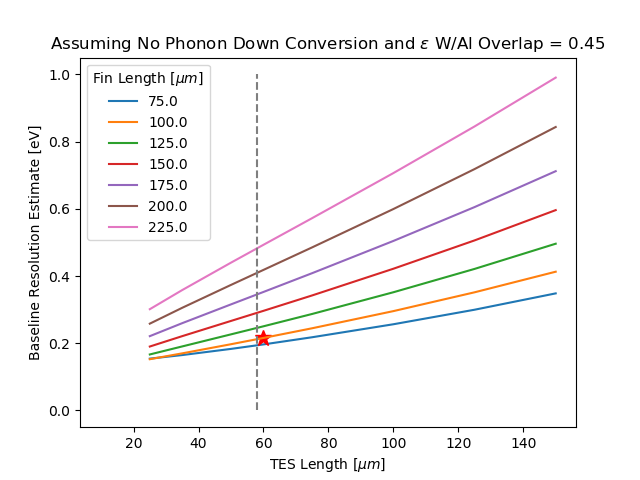

FIN LENGTH  7.5e-05
ERROR INVALID DESIGN: no space for connectors
TES Length              2.5e-05
Fin Length              7.5e-05
Overlap                 1.5e-05
N Fins                  4
Percent Active SA       0.005951233929727672
Percent Passive SA      0.0015397407864998739
Percent QP Absorb SA    0.007490974716227545
N tes                   80
Rn                      0.29999999999999993
fQP Absorb              0.7051854298545557
Phonon Absorption Time  4.886376384271548e-05
Time ETF                6.148499660480031e-05
~~BASE RESOLUTION~~     0.15408885259185454
--------------------------------------
ERROR INVALID DESIGN: no space for connectors
TES Length              3.5e-05
Fin Length              7.5e-05
Overlap                 1.5e-05
N Fins                  4
Percent Active SA       0.008811506215996953
Percent Passive SA      0.0017015507866387542
Percent QP Absorb SA    0.010513057002635709
N tes                   112
Rn                      0.2999999999999999
fQP Absorb  

TES Length              6e-05
Fin Length              0.000125
Overlap                 1.5e-05
N Fins                  4
Percent Active SA       0.045104286130641796
Percent Passive SA      0.0016634225806451614
Percent QP Absorb SA    0.04676770871128696
N tes                   192
Rn                      0.29999999999999993
fQP Absorb              0.4328733128794892
Phonon Absorption Time  7.826708418519458e-06
Time ETF                6.14849966048003e-05
~~BASE RESOLUTION~~     0.2503021802748463
--------------------------------------
TES Length              7.5e-05
Fin Length              0.000125
Overlap                 1.5e-05
N Fins                  4
Percent Active SA       0.05910060077604268
Percent Passive SA      0.001603869230769231
Percent QP Absorb SA    0.06070447000681191
N tes                   240
Rn                      0.2999999999999999
fQP Absorb              0.41885135873703233
Phonon Absorption Time  6.02982316531914e-06
Time ETF                6.14849966048003

ERROR INVALID DESIGN: no space for connectors
TES Length              5e-05
Fin Length              0.000175
Overlap                 1.5e-05
N Fins                  4
Percent Active SA       0.06961182858376185
Percent Passive SA      0.0013731
Percent QP Absorb SA    0.07098492858376185
N tes                   160
Rn                      0.29999999999999993
fQP Absorb              0.2959621205742487
Phonon Absorption Time  5.156548393981595e-06
Time ETF                6.148499660480031e-05
~~BASE RESOLUTION~~     0.31553745559369906
--------------------------------------
TES Length              6e-05
Fin Length              0.000175
Overlap                 1.5e-05
N Fins                  4
Percent Active SA       0.08561330915802706
Percent Passive SA      0.0013487097560975609
Percent QP Absorb SA    0.08696201891412463
N tes                   192
Rn                      0.29999999999999993
fQP Absorb              0.29015718978854355
Phonon Absorption Time  4.20916193133647e-06
Time 

ERROR INVALID DESIGN: no space for connectors
TES Length              3.5e-05
Fin Length              0.000225
Overlap                 1.5e-05
N Fins                  4
Percent Active SA       0.0769534029420301
Percent Passive SA      0.0011978422680412372
Percent QP Absorb SA    0.07815124521007133
N tes                   112
Rn                      0.2999999999999999
fQP Absorb              0.21158060025172856
Phonon Absorption Time  4.683702972378543e-06
Time ETF                6.148499660480031e-05
~~BASE RESOLUTION~~     0.3582373569694143
--------------------------------------
ERROR INVALID DESIGN: no space for connectors
TES Length              5e-05
Fin Length              0.000225
Overlap                 1.5e-05
N Fins                  4
Percent Active SA       0.11331772450961725
Percent Passive SA      0.0011730999999999998
Percent QP Absorb SA    0.11449082450961726
N tes                   160
Rn                      0.29999999999999993
fQP Absorb              0.2061034374

In [5]:
f, ax = plt.subplots(1)
for l_fin in l_fins:
    print("FIN LENGTH ", l_fin)
    sigma_e = []
    for tes_l in tes_lengths: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
        qet = QET( l_fin, h_fin, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        
        perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
        overlap_p = n_fin*l_over*2
        if overlap_p > perim: print("ERROR INVALID DESIGN: no space for connectors")
        
        if tes_l == 60e-6 and l_fin == 100e-6: 
            ax.plot(60, e_res, "r*", markersize=12)
            print("STAR!")
        
        print("TES Length             ", tes_l)
        print("Fin Length             ", l_fin)
        print("Overlap                ", l_over)
        print("N Fins                 ", n_fin)
        pActiveArea = det._SA_active/det._absorber.get_SA()
        print("Percent Active SA      ", pActiveArea)
        pPassiveArea = det._SA_passive/det._absorber.get_SA()
        print("Percent Passive SA     ", pPassiveArea)
        print("Percent QP Absorb SA   ", det._fSA_qpabsorb)
        print("N tes                  ", det._tes._nTES)
        print("Rn                     ", det._tes._total_res_n )
        print("fQP Absorb             ", det._qet._eQPabsb)
        print("Phonon Absorption Time ", det._t_pabsb)
        print("Time ETF               ", det._tes._tau_etf)
        print("~~BASE RESOLUTION~~    ", e_res)
        print("--------------------------------------")
    
        
    fin_string = "{}"
    ax.plot(tes_lengths_mu, sigma_e, label = fin_string.format(l_fin*(10**6)) )

l_tes_min = n_fin*l_over - (14e-6) + n_fin*3e-6
y = [0, 1.0]
l_mins = [l_tes_min*(10**6), l_tes_min*(10**6)]
ax.plot(l_mins, y, '--')
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("TES Length [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()


In [6]:
n_fin = 4

l_over = 10e-6

<IPython.core.display.Javascript object>


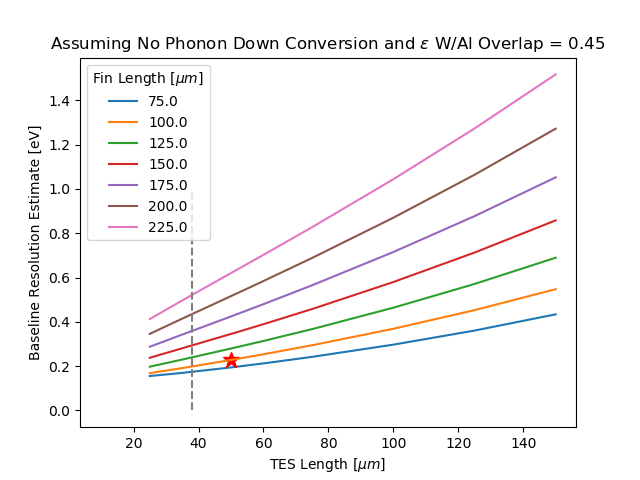

FIN LENGTH  7.5e-05
ERROR INVALID DESIGN: no space for connectors
TES Length              2.5e-05
Fin Length              7.5e-05
Overlap                 1e-05
N Fins                  4
Percent Active SA       0.005951233929727672
Percent Passive SA      0.0015397407864998739
Percent QP Absorb SA    0.007490974716227545
N tes                   80
Rn                      0.29999999999999993
fQP Absorb              0.5316384393391002
Phonon Absorption Time  4.886376384271548e-05
Time ETF                6.14849966048003e-05
~~BASE RESOLUTION~~     0.15520256304364025
--------------------------------------
ERROR INVALID DESIGN: no space for connectors
TES Length              3.5e-05
Fin Length              7.5e-05
Overlap                 1e-05
N Fins                  4
Percent Active SA       0.008811506215996953
Percent Passive SA      0.0017015507866387542
Percent QP Absorb SA    0.010513057002635709
N tes                   112
Rn                      0.2999999999999999
fQP Absorb       

ERROR INVALID DESIGN: no space for connectors
TES Length              3.5e-05
Fin Length              0.000125
Overlap                 1e-05
N Fins                  4
Percent Active SA       0.024195088932965157
Percent Passive SA      0.0015615507866387544
Percent QP Absorb SA    0.025756639719603912
N tes                   112
Rn                      0.2999999999999999
fQP Absorb              0.29082230315587937
Phonon Absorption Time  1.4211373202029025e-05
Time ETF                6.14849966048003e-05
~~BASE RESOLUTION~~     0.2296850976522217
--------------------------------------
TES Length              5e-05
Fin Length              0.000125
Overlap                 1e-05
N Fins                  4
Percent Active SA       0.03637790816987242
Percent Passive SA      0.0016704665961010275
Percent QP Absorb SA    0.03804837476597345
N tes                   160
Rn                      0.29999999999999993
fQP Absorb              0.27897150220102207
Phonon Absorption Time  9.6203115569824

TES Length              6e-05
Fin Length              0.000175
Overlap                 1e-05
N Fins                  4
Percent Active SA       0.08561330915802706
Percent Passive SA      0.0013487097560975609
Percent QP Absorb SA    0.08696201891412463
N tes                   192
Rn                      0.29999999999999993
fQP Absorb              0.167467548175956
Phonon Absorption Time  4.20916193133647e-06
Time ETF                6.14849966048003e-05
~~BASE RESOLUTION~~     0.4797004141198336
--------------------------------------
TES Length              7.5e-05
Fin Length              0.000175
Overlap                 1e-05
N Fins                  4
Percent Active SA       0.11091497680537044
Percent Passive SA      0.0013142764705882351
Percent QP Absorb SA    0.11222925327595866
N tes                   240
Rn                      0.2999999999999999
fQP Absorb              0.16181523087320399
Phonon Absorption Time  3.2615134539428193e-06
Time ETF                6.148499660480031e-0

TES Length              0.0001
Fin Length              0.000225
Overlap                 1e-05
N Fins                  4
Percent Active SA       0.24919739392115794
Percent Passive SA      0.0011003727272727274
Percent QP Absorb SA    0.2502977666484307
N tes                   320
Rn                      0.29999999999999993
fQP Absorb              0.10340401234484344
Phonon Absorption Time  1.462407053753831e-06
Time ETF                6.14849966048003e-05
~~BASE RESOLUTION~~     1.0439190878128035
--------------------------------------
TES Length              0.000125
Fin Length              0.000225
Overlap                 1e-05
N Fins                  4
Percent Active SA       0.32559795796514956
Percent Passive SA      0.0010687521739130435
Percent QP Absorb SA    0.3266667101390626
N tes                   400
Rn                      0.29999999999999993
fQP Absorb              0.09865591132688925
Phonon Absorption Time  1.120521951348127e-06
Time ETF                6.14849966048003e

In [7]:
f, ax = plt.subplots(1)
for l_fin in l_fins:
    print("FIN LENGTH ", l_fin)
    sigma_e = []
    for tes_l in tes_lengths: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
        qet = QET( l_fin, h_fin, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        
        perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
        overlap_p = n_fin*l_over*2
        if overlap_p > perim: print("ERROR INVALID DESIGN: no space for connectors")
        
        if tes_l == 50e-6 and l_fin == 100e-6: 
            ax.plot(50, e_res, "r*", markersize=12)
            print("STAR!")
        
        print("TES Length             ", tes_l)
        print("Fin Length             ", l_fin)
        print("Overlap                ", l_over)
        print("N Fins                 ", n_fin)
        pActiveArea = det._SA_active/det._absorber.get_SA()
        print("Percent Active SA      ", pActiveArea)
        pPassiveArea = det._SA_passive/det._absorber.get_SA()
        print("Percent Passive SA     ", pPassiveArea)
        print("Percent QP Absorb SA   ", det._fSA_qpabsorb)
        print("N tes                  ", det._tes._nTES)
        print("Rn                     ", det._tes._total_res_n )
        print("fQP Absorb             ", det._qet._eQPabsb)
        print("Phonon Absorption Time ", det._t_pabsb)
        print("Time ETF               ", det._tes._tau_etf)
        print("~~BASE RESOLUTION~~    ", e_res)
        print("--------------------------------------")
    
        
    fin_string = "{}"
    ax.plot(tes_lengths_mu, sigma_e, label = fin_string.format(l_fin*(10**6)) )

l_tes_min = n_fin*l_over - (14e-6) + n_fin*3e-6
y = [0, 1.0]
l_mins = [l_tes_min*(10**6), l_tes_min*(10**6)]
ax.plot(l_mins, y, '--')
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("TES Length [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()


In [8]:
n_fin = 2

l_over = 20e-6

<IPython.core.display.Javascript object>


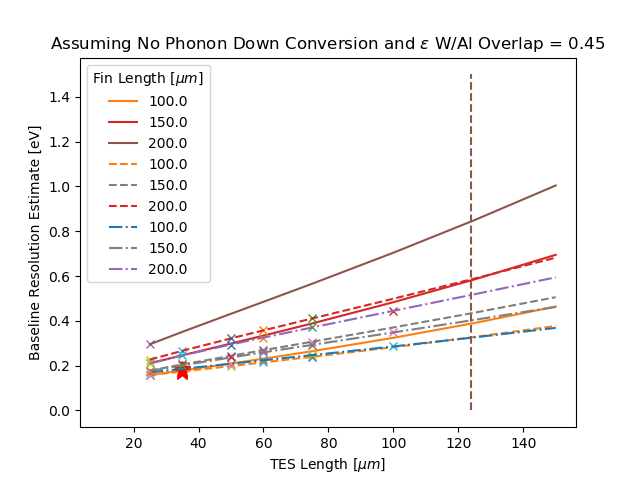

FIN LENGTH  0.0001
ERROR INVALID DESIGN: no space for connectors
TES Length              2.5e-05
Fin Length              0.0001
Overlap                 2e-05
N Fins                  2
Percent Active SA       0.011157972450961723
Percent Passive SA      0.001489740786499874
Percent QP Absorb SA    0.012647713237461597
N tes                   80
Rn                      0.29999999999999993
fQP Absorb              0.498805738056307
Phonon Absorption Time  2.8940980287355034e-05
Time ETF                6.14849966048003e-05
~~BASE RESOLUTION~~     0.15848468725580198
---------------------------------
STAR!
TES Length              3.5e-05
Fin Length              0.0001
Overlap                 2e-05
N Fins                  2
Percent Active SA       0.016284199717184037
Percent Passive SA      0.0016315507866387544
Percent QP Absorb SA    0.01791575050382279
N tes                   112
Rn                      0.2999999999999999
fQP Absorb              0.4865169966294431
Phonon Absorption Time  

TES Length              6e-05
Fin Length              0.0002
Overlap                 2e-05
N Fins                  2
Percent Active SA       0.1127354096521044
Percent Passive SA      0.001242665217391304
Percent QP Absorb SA    0.1139780748694957
N tes                   192
Rn                      0.29999999999999993
fQP Absorb              0.19153693835400518
Phonon Absorption Time  3.211470450826671e-06
Time ETF                6.148499660480031e-05
~~BASE RESOLUTION~~     0.4847608701461767
---------------------------------
TES Length              7.5e-05
Fin Length              0.0002
Overlap                 2e-05
N Fins                  2
Percent Active SA       0.14540665104551517
Percent Passive SA      0.0012152052631578948
Percent QP Absorb SA    0.14662185630867305
N tes                   240
Rn                      0.2999999999999999
fQP Absorb              0.18597850271761435
Phonon Absorption Time  2.4964710494109563e-06
Time ETF                6.148499660480031e-05
~~BASE

ERROR INVALID DESIGN: no space for connectors
TES Length              5e-05
Fin Length              0.00015
Overlap                 2e-05
N Fins                  4
Percent Active SA       0.05168587143782137
Percent Passive SA      0.0015159571428571429
Percent QP Absorb SA    0.05320182858067851
N tes                   160
Rn                      0.29999999999999993
fQP Absorb              0.49039391039149394
Phonon Absorption Time  6.880162378825272e-06
Time ETF                6.14849966048003e-05
~~BASE RESOLUTION~~     0.24368513568014916
---------------------------------
ERROR INVALID DESIGN: no space for connectors
TES Length              6e-05
Fin Length              0.00015
Overlap                 2e-05
N Fins                  4
Percent Active SA       0.06378800131753952
Percent Passive SA      0.001484211111111111
Percent QP Absorb SA    0.06527221242865063
N tes                   192
Rn                      0.29999999999999993
fQP Absorb              0.4821129917096717
Phono

ERROR INVALID DESIGN: no space for connectors
STAR!
TES Length              3.5e-05
Fin Length              0.0001
Overlap                 2e-05
N Fins                  6
Percent Active SA       0.014889799717184035
Percent Passive SA      0.0016315507866387544
Percent QP Absorb SA    0.01652135050382279
N tes                   112
Rn                      0.2999999999999999
fQP Absorb              0.7946951342404271
Phonon Absorption Time  2.2155405479763895e-05
Time ETF                6.148499660480031e-05
~~BASE RESOLUTION~~     0.1852916601327926
---------------------------------
ERROR INVALID DESIGN: no space for connectors
TES Length              5e-05
Fin Length              0.0001
Overlap                 2e-05
N Fins                  6
Percent Active SA       0.02269193877991494
Percent Passive SA      0.0017704665961010275
Percent QP Absorb SA    0.024462405376015968
N tes                   160
Rn                      0.29999999999999993
fQP Absorb              0.78096320332376

ERROR INVALID DESIGN: no space for connectors
TES Length              2.5e-05
Fin Length              0.0002
Overlap                 2e-05
N Fins                  6
Percent Active SA       0.041686895925855394
Percent Passive SA      0.0012897407864998738
Percent QP Absorb SA    0.04297663671235527
N tes                   80
Rn                      0.29999999999999993
fQP Absorb              0.48559792417530934
Phonon Absorption Time  8.517121103156591e-06
Time ETF                6.148499660480031e-05
~~BASE RESOLUTION~~     0.21034209120849345
---------------------------------
ERROR INVALID DESIGN: no space for connectors
TES Length              3.5e-05
Fin Length              0.0002
Overlap                 2e-05
N Fins                  6
Percent Active SA       0.0597577308678728
Percent Passive SA      0.0012926402298850575
Percent QP Absorb SA    0.061050371097757856
N tes                   112
Rn                      0.2999999999999999
fQP Absorb              0.47907134507724297
P

In [9]:
l_fins = [ 100e-6,  150e-6, 200e-6]
l_fins_mu = []
for l_f in l_fins:
    l_fins_mu.append(l_f*(10**6))

n_fins = [2, 4, 6]

f, ax = plt.subplots(1)
for n_fin in n_fins:
    for l_fin in l_fins:
        print("FIN LENGTH ", l_fin)
        sigma_e = []
        for tes_l in tes_lengths: 
            tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
            qet = QET( l_fin, h_fin, tes, ahole)
            det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
            e_res = simulate_noise(det)
            sigma_e.append(e_res)
        
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p > perim: print("ERROR INVALID DESIGN: no space for connectors")
            if overlap_p > perim: ax.plot(tes_l*(10**6), e_res, 'x')
        
            if tes_l == 35e-6 and l_fin == 100e-6: 
                ax.plot(35, e_res, "r*", markersize=12)
                print("STAR!")
        
            print("TES Length             ", tes_l)
            print("Fin Length             ", l_fin)
            print("Overlap                ", l_over)
            print("N Fins                 ", n_fin)
            pActiveArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pActiveArea)
            pPassiveArea = det._SA_passive/det._absorber.get_SA()
            print("Percent Passive SA     ", pPassiveArea)
            print("Percent QP Absorb SA   ", det._fSA_qpabsorb)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n )
            print("fQP Absorb             ", det._qet._eQPabsb)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("~~BASE RESOLUTION~~    ", e_res)
            print("---------------------------------")
    

    
        fin_string = "{}"
        if n_fin == 2: ax.plot(tes_lengths_mu, sigma_e, label = fin_string.format(l_fin*(10**6)) )
        if n_fin == 4: ax.plot(tes_lengths_mu, sigma_e, '--', label = fin_string.format(l_fin*(10**6)) )
        if n_fin == 6: ax.plot(tes_lengths_mu, sigma_e, '-.', label = fin_string.format(l_fin*(10**6)) )
            

l_tes_min = n_fin*l_over - (14e-6) + n_fin*3e-6
y = [0, 1.5]
l_mins = [l_tes_min*(10**6), l_tes_min*(10**6)]
ax.plot(l_mins, y, '--')
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("TES Length [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

<IPython.core.display.Javascript object>


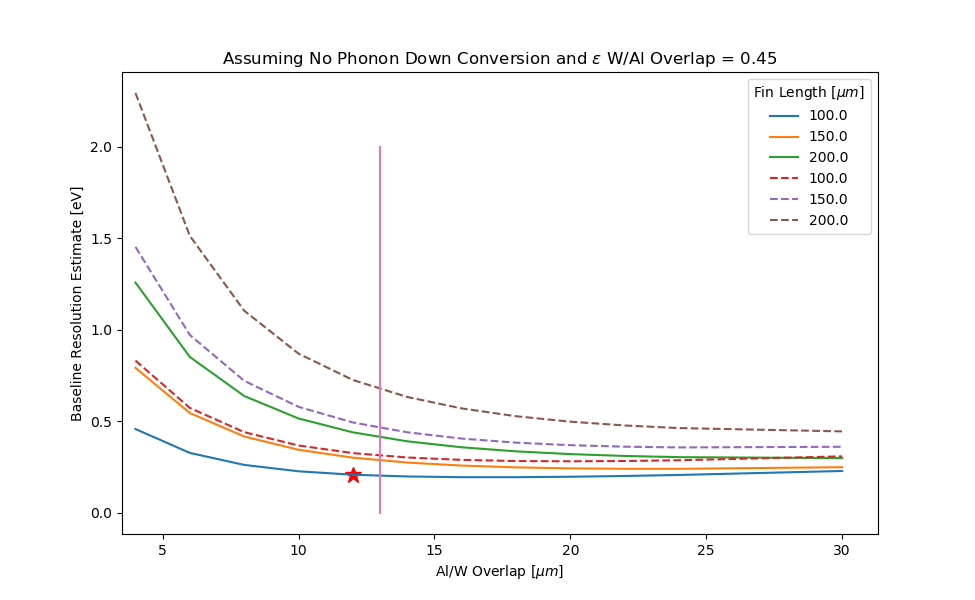

Fin Length              0.0001
TES Length              5e-05
Overlap                 4e-06
N Fins                  4
Percent Active SA       0.023687938779914944
Percent Passive SA      0.0017704665961010275
Percent QP Absorb SA    0.025458405376015972
N tes                   160
Rn                      0.29999999999999993
fQP Absorb              0.1369441990822615
Phonon Absorption Time  1.4377853368237048e-05
Time ETF                6.14849966048003e-05
~~BASE RESOLUTION~~     0.458477318790436
Fin Length              0.0001
TES Length              5e-05
Overlap                 6e-06
N Fins                  4
Percent Active SA       0.023687938779914944
Percent Passive SA      0.0017704665961010275
Percent QP Absorb SA    0.025458405376015972
N tes                   160
Rn                      0.29999999999999993
fQP Absorb              0.2082465388955303
Phonon Absorption Time  1.4377853368237048e-05
Time ETF                6.14849966048003e-05
~~BASE RESOLUTION~~     0.328148202419

INVALID DESIGN!!!
Fin Length              0.00015
TES Length              5e-05
Overlap                 2e-05
N Fins                  4
Percent Active SA       0.05168587143782137
Percent Passive SA      0.0015159571428571429
Percent QP Absorb SA    0.05320182858067851
N tes                   160
Rn                      0.29999999999999993
fQP Absorb              0.49039391039149394
Phonon Absorption Time  6.880162378825272e-06
Time ETF                6.14849966048003e-05
~~BASE RESOLUTION~~     0.24368513568014916
INVALID DESIGN!!!
Fin Length              0.00015
TES Length              5e-05
Overlap                 2.2e-05
N Fins                  4
Percent Active SA       0.05168587143782137
Percent Passive SA      0.0015159571428571429
Percent QP Absorb SA    0.05320182858067851
N tes                   160
Rn                      0.29999999999999993
fQP Absorb              0.5357106851164173
Phonon Absorption Time  6.880162378825272e-06
Time ETF                6.148499660480031e-05


Fin Length              0.0001
TES Length              0.0001
Overlap                 1.2e-05
N Fins                  4
Percent Active SA       0.056847853071795865
Percent Passive SA      0.001706433333333333
Percent QP Absorb SA    0.0585542864051292
N tes                   320
Rn                      0.29999999999999993
fQP Absorb              0.38798253093336377
Phonon Absorption Time  6.251245501532259e-06
Time ETF                6.14849966048003e-05
~~BASE RESOLUTION~~     0.32694973403000777
Fin Length              0.0001
TES Length              0.0001
Overlap                 1.4e-05
N Fins                  4
Percent Active SA       0.056847853071795865
Percent Passive SA      0.001706433333333333
Percent QP Absorb SA    0.0585542864051292
N tes                   320
Rn                      0.29999999999999993
fQP Absorb              0.45567481395943554
Phonon Absorption Time  6.251245501532259e-06
Time ETF                6.14849966048003e-05
~~BASE RESOLUTION~~     0.3030827683

Fin Length              0.0002
TES Length              0.0001
Overlap                 4e-06
N Fins                  4
Percent Active SA       0.20025551023931953
Percent Passive SA      0.0011730999999999998
Percent QP Absorb SA    0.20142861023931952
N tes                   320
Rn                      0.29999999999999993
fQP Absorb              0.03800326378636054
Phonon Absorption Time  1.8172057040487079e-06
Time ETF                6.14849966048003e-05
~~BASE RESOLUTION~~     2.2931850298524084
Fin Length              0.0002
TES Length              0.0001
Overlap                 6e-06
N Fins                  4
Percent Active SA       0.20025551023931953
Percent Passive SA      0.0011730999999999998
Percent QP Absorb SA    0.20142861023931952
N tes                   320
Rn                      0.29999999999999993
fQP Absorb              0.06125295976910524
Phonon Absorption Time  1.8172057040487079e-06
Time ETF                6.148499660480031e-05
~~BASE RESOLUTION~~     1.5131569556

In [11]:
n_fin = 4 

tes_lengths = [50e-6,  100e-6]
f, ax = plt.subplots(1)

for tes_l in tes_lengths:
    for l_f in l_fins:
        sigma_e = []
        for l_over in l_overlaps: 
            tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
            qet = QET( l_f, h_fin, tes, ahole)
            det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
            e_res = simulate_noise(det)
            sigma_e.append(e_res)
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p > perim: print("INVALID DESIGN!!!")
        
            if tes_l == 50e-6 and l_f == 100e-6 and l_over == 12e-6: 
                ax.plot(12, e_res, "r*", markersize=12)
                print("STAR!")
                
            print("Fin Length             ", l_f)
            print("TES Length             ", tes_l)
            print("Overlap                ", l_over)
            print("N Fins                 ", n_fin)
            pActiveArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pActiveArea)
            pPassiveArea = det._SA_passive/det._absorber.get_SA()
            print("Percent Passive SA     ", pPassiveArea)
            print("Percent QP Absorb SA   ", det._fSA_qpabsorb)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n )
            print("fQP Absorb             ", det._qet._eQPabsb)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("~~BASE RESOLUTION~~    ", e_res)
    
        fin_string = "{}"
        if tes_l == 50e-6: ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
        if tes_l == 100e-6: ax.plot(l_overlaps_mu, sigma_e, '--' , label = fin_string.format(l_f*(10**6)) )
            
l_over_max = (14*2e-6 - n_fin*6e-6 +2*50e-6)/(n_fin*2)
x = [l_over_max*(10**6), l_over_max*(10**6)]
y = [0,2]
ax.plot(x, y)
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

In [ ]:
l_f = 150e-6
h_fins = [200e-9, 400e-9, 600e-9, 800e-9, 1000e-9, 1200e-9]
f, ax = plt.subplots(1)
for h_fin in h_fins:
    print("FIN THICKNESS ", h_fin)
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
        qet = QET( l_f, h_fin, tes, ahole)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if ( l_f == 150e-6 or l_f == 175e-6) and (l_over == 10e-6 or l_over == 20e-6 or l_over == 24e-6):
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p > perim: print("INVALID DESIGN!!!")
            print("Fin Length             ", l_f)
            print("Overlap                ", l_over)
            pActiveArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pActiveArea)
            pPassiveArea = det._SA_passive/det._absorber.get_SA()
            print("Percent Passive SA     ", pPassiveArea)
            print("Percent QP Absorb SA   ", det._fSA_qpabsorb)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n )
            print("fQP Absorb             ", det._qet._eQPabsb)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("~~BASE RESOLUTION~~    ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(h_fin*(10**6)) )
plt.legend(title = "Fin Thickness [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()